<h1 align='center' style="color: #590696;">HOUSE PRICE PREDICTION</h1> 

<h4 style="color: blue;"><em><b>STEP:1--</b>  Importing libraries</em></h4>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

<h4 style="color: blue;"><em><b>STEP:2--</b>  Get Data</em></h4>

In [6]:
data_raw = sklearn.datasets.fetch_california_housing()  # Getting raw data
print(data_raw.DESCR)                                   # Veiwing description of the data
data_raw                                                # Entire veiw of data in raw format

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

<h4 style="color: blue;"><em><b>STEP:3--</b>  Data preprocessing</em></h4>
<ol style="color: #1F4690 ">
    <li>Convert to pandas DataFrame</li>
    <li>Check data information</li>
    <li>Check for null values</li>
    <li>Get basic Stats of data</li>
</ol>

In [7]:
# Converting only feature variables of raw data into pandas Dataframe

df_features = pd.DataFrame(data_raw.data, columns = data_raw.feature_names)
df_features

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [8]:
print(data_raw.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
# Converting only target variables of raw data into pandas Dataframe

df_targets = pd.DataFrame(data_raw.target, columns = data_raw.target_names)
df_targets

MedHouseVal
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422
...            ...
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894

[20640 rows x 1 columns]

In [10]:
# Combinig both the pandas DataFrames to get the final DataFrame 'df'

df = pd.concat([df_features,df_targets], axis = 1)
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [11]:
print(df.to_string())  # function to veiw entire data

        MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  Latitude  Longitude  MedHouseVal
0       8.3252      41.0    6.984127   1.023810       322.0     2.555556     37.88    -122.23      4.52600
1       8.3014      21.0    6.238137   0.971880      2401.0     2.109842     37.86    -122.22      3.58500
2       7.2574      52.0    8.288136   1.073446       496.0     2.802260     37.85    -122.24      3.52100
3       5.6431      52.0    5.817352   1.073059       558.0     2.547945     37.85    -122.25      3.41300
4       3.8462      52.0    6.281853   1.081081       565.0     2.181467     37.85    -122.25      3.42200
5       4.0368      52.0    4.761658   1.103627       413.0     2.139896     37.85    -122.25      2.69700
6       3.6591      52.0    4.931907   0.951362      1094.0     2.128405     37.84    -122.25      2.99200
7       3.1200      52.0    4.797527   1.061824      1157.0     1.788253     37.84    -122.25      2.41400
8       2.0804      42.0    4.294118 

In [12]:
# checking NULL values in dataframe
print(df.isnull().to_string())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0       False     False     False      False       False     False     False      False        False
1       False     False     False      False       False     False     False      False        False
2       False     False     False      False       False     False     False      False        False
3       False     False     False      False       False     False     False      False        False
4       False     False     False      False       False     False     False      False        False
5       False     False     False      False       False     False     False      False        False
6       False     False     False      False       False     False     False      False        False
7       False     False     False      False       False     False     False      False        False
8       False     False     False      False       False     False     False      False    

In [13]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [14]:
# Checking basic Stats of data
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [15]:
df.MedHouseVal.max()

5.00001

<h4 style="color: blue;"><em><b>STEP:4--</b>  Data Analysis</em></h4>
<ol style="color: #1F4690 ">
    <li>Calaculate Co-Relatoion</li>
    <li>Construct a heatmap to understand co-relation</li>
</ol>

In [17]:
corelation = df.corr()   # Calculation if co-relation 
corelation

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

<AxesSubplot:>

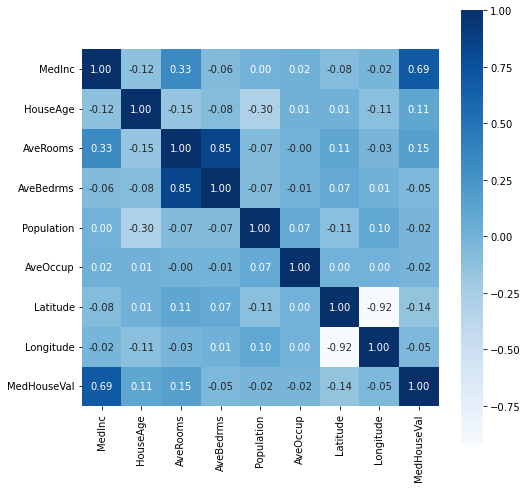

In [18]:
# plotting of heatmap

plt.figure(figsize=(8,8))
sns.heatmap(corelation, cmap='Blues', square=True, cbar=True,fmt='.2f',annot=True, annot_kws={'size':10})

<h4 style="color: blue;"><em><b>STEP:5--</b>  Splitting Data</em></h4>
<ol style="color: #1F4690 ">
    <li>Make feature variable <b>(X)</b> and target variable <b>(Y)</b> </li>
    <li>Split the data using train test split</li>
</ol>

In [19]:
X = df_features   # alternate way  X = df.drop(['MedHouseVal'],axis=1)
Y = df_targets    # alternate way  Y = df['MedHouseVal']  
X



MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [20]:
Y

MedHouseVal
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422
...            ...
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894

[20640 rows x 1 columns]

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

In [22]:
X_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5500   3.7250      35.0  3.443320   0.975709      1428.0  2.890688     33.99   
15860  4.5057      52.0  4.865546   0.983193      1047.0  2.199580     37.76   
7232   2.1250      36.0  3.464789   0.968310      1024.0  3.605634     34.02   
6115   2.6629      33.0  4.952909   1.263158      1787.0  4.950139     34.12   
8828   2.5812      36.0  2.970085   0.978632       874.0  1.867521     34.09   
...       ...       ...       ...        ...         ...       ...       ...   
5520   6.5778      46.0  6.561194   1.050746       839.0  2.504478     33.97   
3046   2.4044      34.0  5.478632   1.079772      1101.0  3.136752     35.50   
20463  5.8096      20.0  8.165888   1.049065      1629.0  3.806075     34.27   
18638  3.5943      14.0  5.001474   1.071481      3416.0  2.517318     36.99   
2915   4.3482       9.0  5.792453   1.103774       409.0  1.929245     35.36   

       Longitude  
5500     -118.42  
15860    -122.39  
7232     -118.13  
6115     -117.90  
8828     -118.36  
...          ...  
5520     -118.39  
3046     -119.28  
20463    -118.75  
18638    -121.98  
2915     -119.06  

[16512 rows x 8 columns]

In [23]:
X_test

MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14772  2.7361      14.0   4.206612   0.983471      1224.0  3.371901     32.57   
10105  3.6106      18.0   4.393468   1.026439      1590.0  2.472784     33.92   
20094  2.1250      26.0  37.063492   7.185185       416.0  2.201058     38.19   
19261  2.6576      23.0   5.163004   1.120879      1644.0  3.010989     38.44   
14139  2.5583      31.0   4.606335   1.133484      1263.0  2.857466     32.75   
...       ...       ...        ...        ...         ...       ...       ...   
11352  2.6442      23.0   4.134259   1.032407      1149.0  5.319444     33.75   
16121  3.7419      52.0   5.121891   1.034826       999.0  2.485075     37.79   
8976   2.8797      33.0   3.577922   1.054113      2475.0  2.678571     34.01   
8439   3.0132      44.0   4.905660   1.094340       392.0  3.698113     33.93   
13513  2.0391      38.0   4.691460   1.060606      1356.0  3.735537     34.12   

       Longitude  
14772    -117.07  
10105    -117.95  
20094    -120.03  
19261    -122.74  
14139    -117.07  
...          ...  
11352    -117.92  
16121    -122.46  
8976     -118.41  
8439     -118.36  
13513    -117.33  

[4128 rows x 8 columns]

In [24]:
Y_train

MedHouseVal
5500         2.846
15860        3.216
7232         1.535
6115         1.241
8828         2.000
...            ...
5520         3.508
3046         0.658
20463        2.644
18638        2.624
2915         0.952

[16512 rows x 1 columns]

In [25]:
Y_test

MedHouseVal
14772      0.93600
10105      1.53600
20094      1.32500
19261      1.47900
14139      1.20700
...            ...
11352      1.56300
16121      5.00001
8976       2.85300
8439       2.02500
13513      0.70400

[4128 rows x 1 columns]

<h4 style="color: blue;"><em><b>STEP:6--</b>  Model Buliding</em></h4>
<ol style="color: #1F4690 ">
    <li>Get the ML model</li>
    <li>Feed data to that model</li>
</ol>

In [27]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<h4 style="color: blue;"><em><b>STEP:7--</b>  Model Evaluation</em></h4>
<ol style="color: #1F4690 ">
    <li>Predict values<b> (Y_Pre_train)</b> of traning data and compare with orgianl values <b>(Y_train)</b></li>
    <li>Predict values<b> (Y_Pre_test)</b> of testing data and compare with orgianl values <b>(Y_test)</b></li>
    <li>Calculate errors for traning and testing data</li>
    <ul>
        <li><b>R Square Error</b></li>
        <li><b>Mean absolute error</b></li>
    </ul>
    
</ol>

[2.8130243  3.631059   1.4806713  ... 2.519583   2.5993104  0.96871006]
       MedHouseVal  Pred MedHouseVal
5500         2.846          2.813024
15860        3.216          3.631059
7232         1.535          1.480671
6115         1.241          1.433456
8828         2.000          2.496796
...            ...               ...
5520         3.508          3.969204
3046         0.658          0.797892
20463        2.644          2.519583
18638        2.624          2.599310
2915         0.952          0.968710

[16512 rows x 2 columns]


<AxesSubplot:>

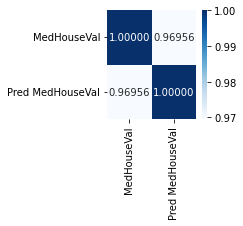

In [29]:
# Traning data evaluation

Y_Pre_train = model.predict(X_train)
print(Y_Pre_train)

#comapring using graphs heatmap
Y_Pre_train_df = pd.DataFrame(Y_Pre_train, columns=['Pred MedHouseVal'],index=Y_train.index)  # Converting predicted values into dataframe
Y_Pre_train_df
df_train_corr = pd.concat([Y_train,Y_Pre_train_df],axis = 1)   # Comining actual values and predicted values to get the dataframe
print(df_train_corr)

corr_trained = df_train_corr.corr()       # Calculating co-relation using the actual,predicted values dataframe
corr_trained

plt.figure(figsize=(2,2))
sns.heatmap(corr_trained,cmap='Blues',annot=True,annot_kws={'size':10},fmt='.5f') # Constructing heatmap





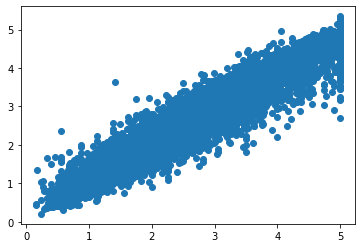

In [30]:
#scatter polt
plt.scatter(Y_train,Y_Pre_train)

In [31]:
# Error calculation for training data
RSq = metrics.r2_score(Y_train,Y_Pre_train)
print(RSq)
MAb = metrics.mean_absolute_error(Y_train,Y_Pre_train)
print(MAb)

0.9393781760983909
0.19911218217489363


[1.323911   1.7709787  1.4280959  ... 2.903635   1.6599592  0.66168237]
       MedHouseVal  Pred MedHouseVal
14772      0.93600          1.323911
10105      1.53600          1.770979
20094      1.32500          1.428096
19261      1.47900          1.362245
14139      1.20700          1.240726
...            ...               ...
11352      1.56300          1.553420
16121      5.00001          4.118837
8976       2.85300          2.903635
8439       2.02500          1.659959
13513      0.70400          0.661682

[4128 rows x 2 columns]


<AxesSubplot:>

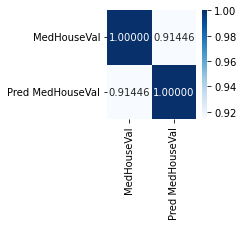

In [32]:
# Evaluation on testing data

Y_Pre_test = model.predict(X_test)
print(Y_Pre_test)

#comapring using graphs heatmap
Y_Pre_test_df = pd.DataFrame(Y_Pre_test, columns=['Pred MedHouseVal'],index=Y_test.index)
Y_Pre_test_df
df_test_corr = pd.concat([Y_test,Y_Pre_test_df],axis = 1)
print(df_test_corr)

corr_tested = df_test_corr.corr()
corr_tested

plt.figure(figsize=(2,2))
sns.heatmap(corr_tested,cmap='Blues',annot=True,annot_kws={'size':10},fmt='.5f')


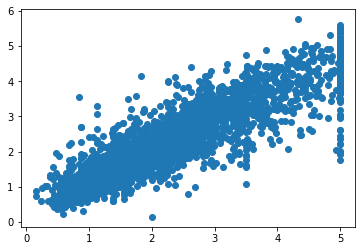

In [33]:
#scatter polt
plt.scatter(Y_test,Y_Pre_test)

In [34]:
# Error calculation for testing data
RSq_test = metrics.r2_score(Y_test,Y_Pre_test)
print(RSq_test)
MAb_test = metrics.mean_absolute_error(Y_test,Y_Pre_test)
print(MAb_test)

0.8360947005987777
0.31517542883182215


<h4>Model is performing well on both traning and testing data. From here it can be expanded and can be used in real time applications</h4>